In [1]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
training_data_generator = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

training_set = training_data_generator.flow_from_directory(
    '/content/drive/MyDrive/dataset/Training',
    target_size=(64,64),
    batch_size=32,
    class_mode='sparse'
)

Found 1244 images belonging to 3 classes.


In [4]:
test_data_generator = ImageDataGenerator(
    rescale=1./255
)

test_set = test_data_generator.flow_from_directory(
    '/content/drive/MyDrive/dataset/Testing',
    target_size=(64,64),
    batch_size=32,
    class_mode='sparse'
)

Found 539 images belonging to 3 classes.


In [5]:
cnn = tf.keras.models.Sequential()                                                                     #type: ignore
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu", input_shape=[64, 64, 3])) #type: ignore
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))                                             #type: ignore
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu"))                          #type: ignore
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))                                             #type: ignore
cnn.add(tf.keras.layers.Flatten())                                                                     #type: ignore
cnn.add(tf.keras.layers.Dense(units=32, activation="relu"))                                            #type: ignore
cnn.add(tf.keras.layers.Dense(units=5, activation="softmax"))                                          #type: ignore
cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [6]:
history = cnn.fit(x=training_set, validation_data=test_set, epochs=10)

Epoch 1/10
39/39 [==============================] - 523s 13s/step - loss: 1.1514 - accuracy: 0.3923 - val_loss: 0.9143 - val_accuracy: 0.5696
Epoch 2/10
39/39 [==============================] - 19s 491ms/step - loss: 0.9090 - accuracy: 0.5498 - val_loss: 0.9916 - val_accuracy: 0.4954
Epoch 3/10
39/39 [==============================] - 19s 484ms/step - loss: 0.7914 - accuracy: 0.6294 - val_loss: 0.7453 - val_accuracy: 0.6345
Epoch 5/10
39/39 [==============================] - 20s 510ms/step - loss: 0.6867 - accuracy: 0.6785 - val_loss: 0.8342 - val_accuracy: 0.6345
Epoch 6/10
39/39 [==============================] - 19s 500ms/step - loss: 0.6284 - accuracy: 0.7114 - val_loss: 0.6814 - val_accuracy: 0.7032
Epoch 7/10
39/39 [==============================] - 20s 506ms/step - loss: 0.6045 - accuracy: 0.7307 - val_loss: 0.7318 - val_accuracy: 0.6753
Epoch 8/10
39/39 [==============================] - 19s 496ms/step - loss: 0.5901 - accuracy: 0.7468 - val_loss: 0.8760 - val_accuracy: 0.6772


In [7]:
cnn.save('model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


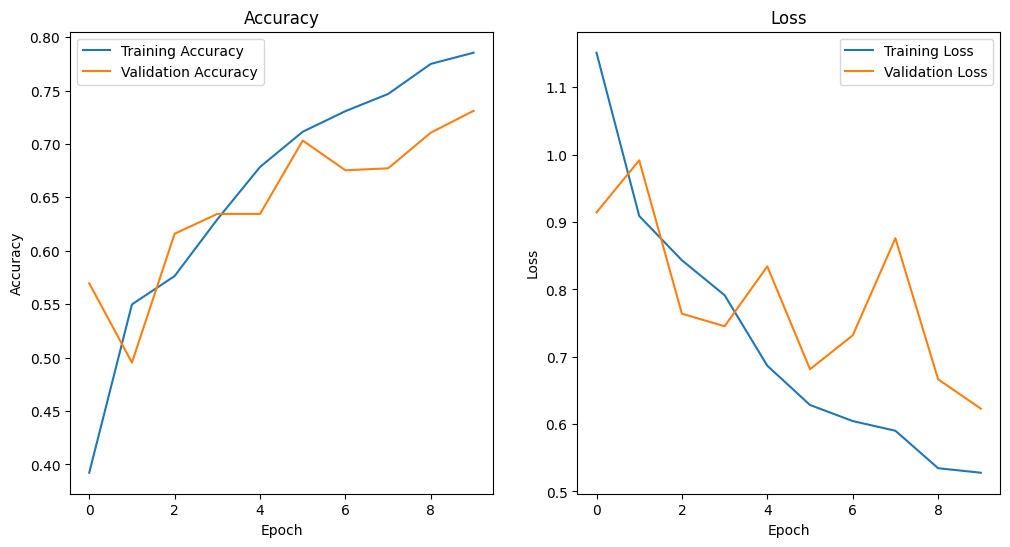

In [8]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()


17/17 [==============================] - 6s 361ms/step - loss: 0.6229 - accuracy: 0.7310
Test Loss: 0.6229250431060791
Test Accuracy: 0.730983316898346
17/17 [==============================] - 6s 339ms/step


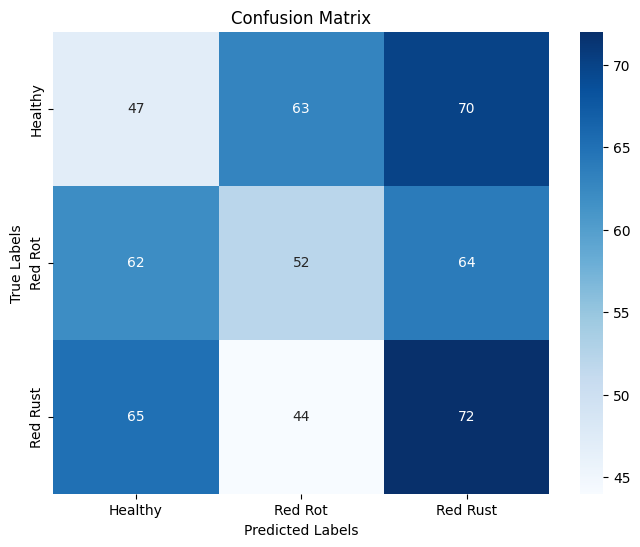

              precision    recall  f1-score   support

     Healthy       0.27      0.26      0.27       180
     Red Rot       0.33      0.29      0.31       178
    Red Rust       0.35      0.40      0.37       181

    accuracy                           0.32       539
   macro avg       0.32      0.32      0.32       539
weighted avg       0.32      0.32      0.32       539



In [9]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

# Load the trained model
cnn = tf.keras.models.load_model('model.h5')

# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(test_set)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

# Predict classes for the test set
predictions = cnn.predict(test_set)
predicted_classes = np.argmax(predictions, axis=1)

# Get true labels
true_classes = test_set.classes

# Plot confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_set.class_indices.keys(), yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print classification report
print(classification_report(true_classes, predicted_classes, target_names=test_set.class_indices.keys()))


Enter the testing image path: /content/drive/MyDrive/rust (365).jpeg
1/1 [==============================] - 1s 518ms/step


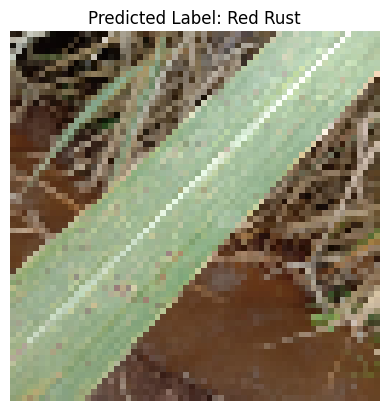

Predicted label: Red Rust
Confidence: 96.59%


In [12]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

# Load the trained model
cnn = tf.keras.models.load_model('model.h5')

# Load the test image
img_path=input('Enter the testing image path: ')
img = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = img_array / 255.0  # Normalize the image data

# Predict the class label
prediction = cnn.predict(img_array)
predicted_class_index = np.argmax(prediction)
class_labels = {v: k for k, v in test_set.class_indices.items()}
predicted_label = class_labels[predicted_class_index]

# Display the image and the predicted label
plt.imshow(img)
plt.axis('off')
plt.title(f'Predicted Label: {predicted_label}')
plt.show()

# Calculate the confidence (accuracy) percentage
confidence = prediction[0][predicted_class_index] * 100
print(f'Predicted label: {predicted_label}')
print(f'Confidence: {confidence:.2f}%')


In [ ]:
/content/drive/MyDrive/rust (365).jpeg